In [3]:
import torch
from torchvision.datasets import STL10
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Data transformation (resize and convert to grayscale)
transform = transforms.Compose([
    transforms.Grayscale(),                # Convert the image to grayscale
    transforms.Resize((32, 32)),           # Resize the image to 32x32
    transforms.ToTensor(),                 # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))   # Normalize the image
])

In [5]:
# Load training and test datasets
train_dataset = STL10(root='./data', split='train', download=True, transform=transform)
test_dataset = STL10(root='./data', split='test', download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# Load data into DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=5000, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [7]:
# Get the training and test data
train_data_iter = iter(train_loader)
test_data_iter = iter(test_loader)

train_images, train_labels = next(train_data_iter)
test_images, test_labels = next(test_data_iter)

In [8]:
# Convert to 2D array and display
train_images = train_images.view(train_images.size(0), -1).numpy()  
test_images = test_images.view(test_images.size(0), -1).numpy()

print(f"Train Data Shape: {train_images.shape}")
print(f"Test Data Shape: {test_images.shape}")

Train Data Shape: (5000, 1024)
Test Data Shape: (1000, 1024)


In [9]:
# Train the Logistic Regression model
# Set parameters|
log_reg = LogisticRegression(max_iter=1000,solver='lbfgs') 

log_reg.fit(train_images, train_labels)  # Fit the model on training data

# Make predictions on the test data
test_predictions = log_reg.predict(test_images)

In [10]:
# Calculate the accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 24.00%


In [11]:
import matplotlib.pyplot as plt

# Define the classes in STL-10
classes = ['Airplane', 'Bird', 'Car', 'Cat', 'Deer', 'Dog', 'Horse', 'Monkey', 'Ship', 'Truck']

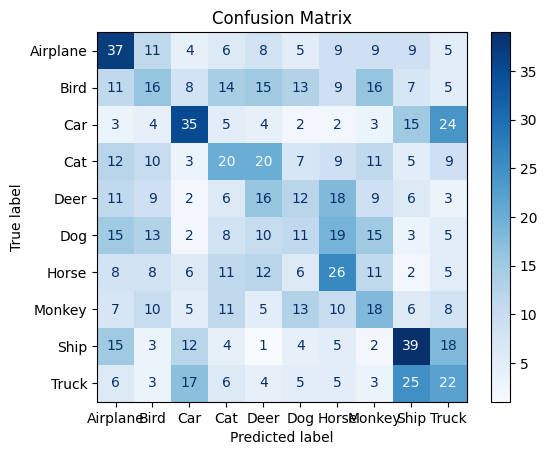

In [12]:
# Confusion Matrix
cm = confusion_matrix(test_labels, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [13]:
#Prediction probabilities
test_probabilities = log_reg.predict_proba(test_images)

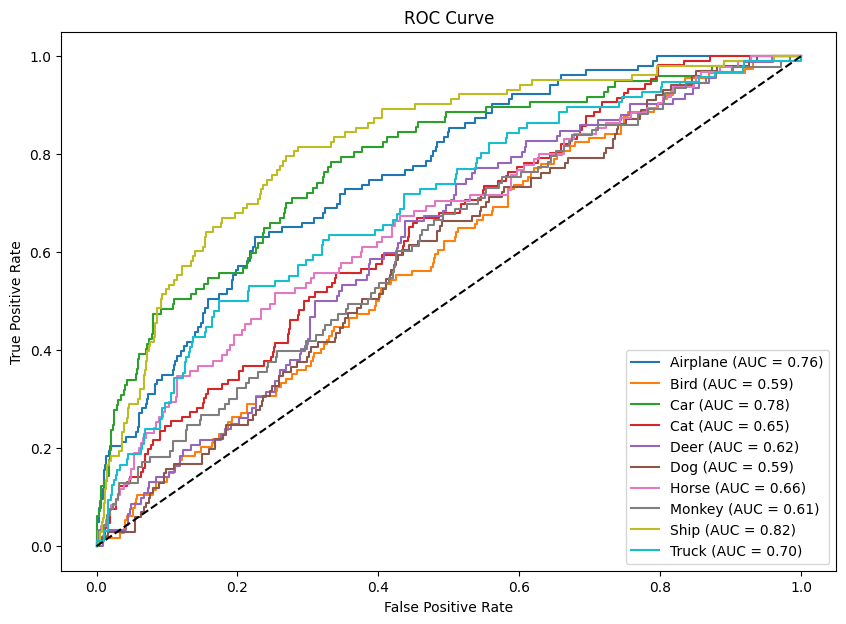

In [14]:
# ROC Curve
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
test_labels_binarized = label_binarize(test_labels, classes=np.arange(len(classes)))

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], test_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()



Class: Airplane
Precision: 0.30
Recall: 0.36
------------------------------
Class: Bird
Precision: 0.18
Recall: 0.14
------------------------------
Class: Car
Precision: 0.37
Recall: 0.36
------------------------------
Class: Cat
Precision: 0.22
Recall: 0.19
------------------------------
Class: Deer
Precision: 0.17
Recall: 0.17
------------------------------
Class: Dog
Precision: 0.14
Recall: 0.11
------------------------------
Class: Horse
Precision: 0.23
Recall: 0.27
------------------------------
Class: Monkey
Precision: 0.19
Recall: 0.19
------------------------------
Class: Ship
Precision: 0.33
Recall: 0.38
------------------------------
Class: Truck
Precision: 0.21
Recall: 0.23
------------------------------

Classification Report:
              precision    recall  f1-score   support

    Airplane       0.30      0.36      0.32       103
        Bird       0.18      0.14      0.16       114
         Car       0.37      0.36      0.37        97
         Cat       0.22      0.19 

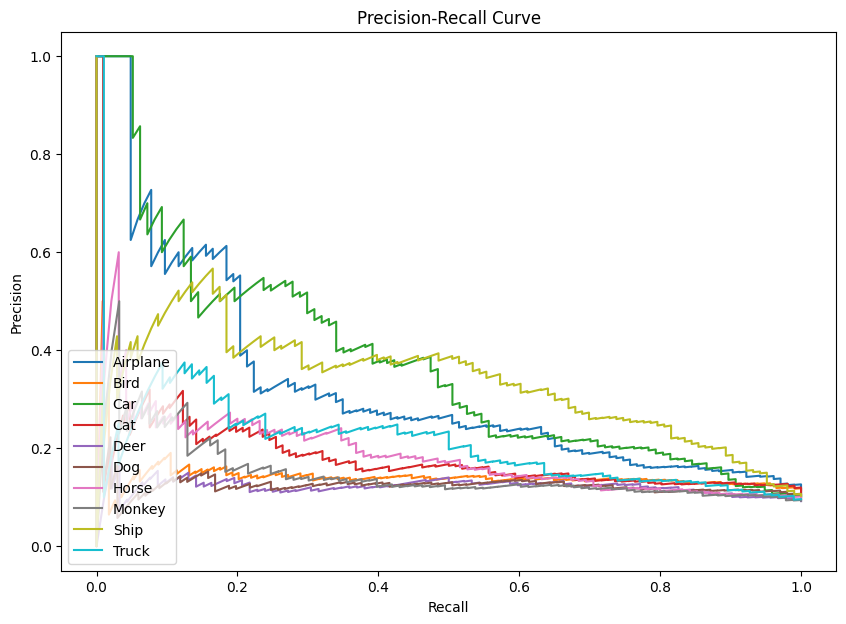

In [16]:
from sklearn.metrics import precision_score, recall_score, classification_report

# حساب Precision و Recall
precision = precision_score(test_labels, test_predictions, average=None)  # حساب Precision لكل فئة
recall = recall_score(test_labels, test_predictions, average=None)  # حساب Recall لكل فئة

# طباعة Precision و Recall لكل فئة
for i in range(len(classes)):
    print(f"Class: {classes[i]}")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print("-" * 30)

# يمكن طباعة تقرير شامل يحتوي على Precision و Recall لكل فئة
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions, target_names=classes))

# رسم Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

# Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    precision_class, recall_class, _ = precision_recall_curve(test_labels_binarized[:, i], test_probabilities[:, i])
    plt.plot(recall_class, precision_class, label=f"{classes[i]}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()


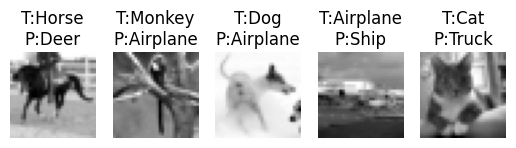

In [18]:
# Display first 5 test images 
for i in range(5):
    img = test_images[i].reshape(32, 32)  # Reshape the image to 32x32 
    true_label = test_labels[i]
    predicted_label = test_predictions[i]

    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T:{classes[true_label]}\nP:{classes[predicted_label]}")
    plt.axis('off')
plt.show()